# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [6]:
# Instalação de bibliotecas básicas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from IPython.display import HTML, Image, display

import plotly.graph_objects as go

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
# Carregando o arquivo CSV diretamente do ambiente de execução local no Colab
df = pd.read_csv('/content/matches.csv')

# Exibindo o shape (dimensão) do dataset
print("Shape do dataset (linhas, colunas):")
print(df.shape)

# Exibindo os tipos de dados de cada coluna
print("\nTipos de dados das colunas:")
print(df.dtypes)

# Verificando dados ausentes
print("\nDados ausentes por coluna:")
print(df.isnull().sum())

# Exibindo as estatísticas básicas (para colunas numéricas)
print("\nEstatísticas básicas dos dados numéricos:")
print(df.describe())

# Exibindo as estatísticas básicas (para colunas categóricas)
print("\nEstatísticas básicas dos dados categóricos:")
print(df.describe(include=['object']))

Shape do dataset (linhas, colunas):
(1389, 28)

Tipos de dados das colunas:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Dados ausentes por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

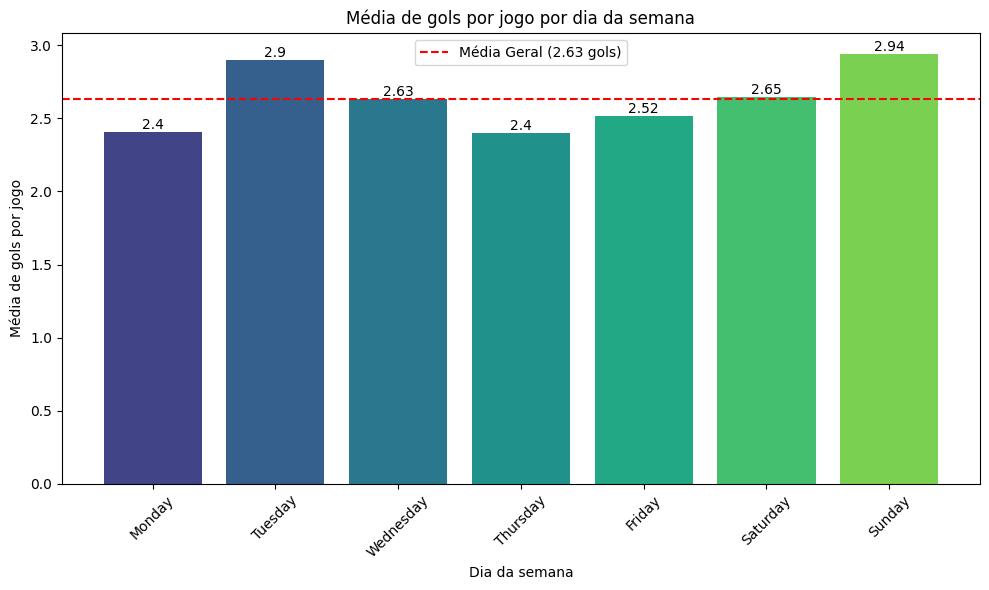

In [29]:
# Carregando o arquivo CSV
df = pd.read_csv('/content/matches.csv')  # Se estiver executando no Google Colab e o arquivo estiver no ambiente de execução

# Criando uma nova coluna com o total de gols por jogo
df['total_goals'] = df['gf'] + df['ga']

# Convertendo a coluna de data para o formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraindo o dia da semana da data
df['day_of_week'] = df['date'].dt.day_name()

# Contando o número de jogos por dia da semana
games_per_day = df.groupby('day_of_week').size()

# Calculando a soma total de gols por dia da semana
total_goals_per_day = df.groupby('day_of_week')['total_goals'].sum()

# Calculando a média de gols por jogo para cada dia da semana
avg_goals_per_game_per_day = total_goals_per_day / games_per_day

# Ordenando os dias da semana para facilitar a leitura
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_goals_per_game_per_day = avg_goals_per_game_per_day.reindex(days_order)

# Calculando a média geral de gols por jogo
overall_avg_goals = avg_goals_per_game_per_day.mean()

# Criando o degradê de cores
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(avg_goals_per_game_per_day)))

# Criando o gráfico com barras e valores acima das barras
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_goals_per_game_per_day.index, avg_goals_per_game_per_day, color=colors)

# Adicionando os valores das médias acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionando a linha de média geral
plt.axhline(overall_avg_goals, color='red', linestyle='--', label=f'Média Geral ({round(overall_avg_goals, 2)} gols)')

# Título e rótulos
plt.title('Média de gols por jogo por dia da semana')
plt.ylabel('Média de gols por jogo')
plt.xlabel('Dia da semana')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

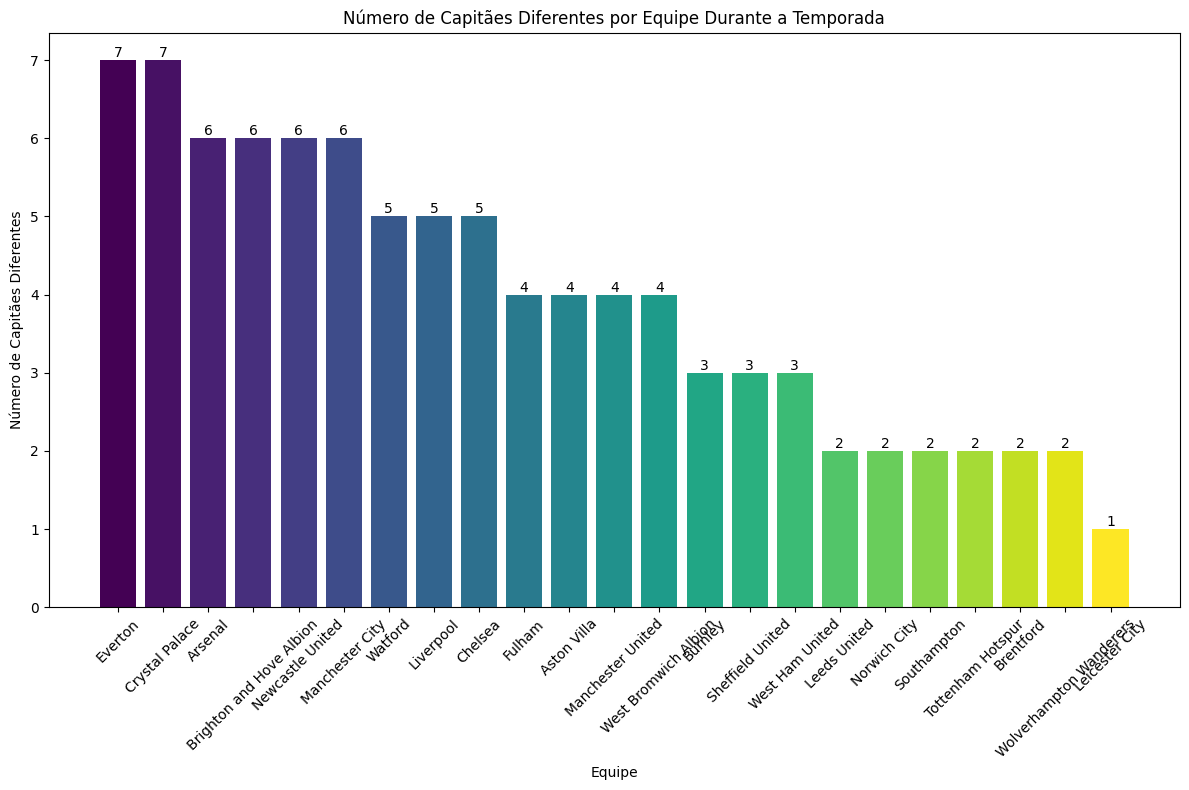

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando o arquivo CSV (substitua o caminho do arquivo se necessário)
df = pd.read_csv('/content/matches.csv')  # Altere o caminho conforme necessário

# Verificando as entradas únicas de capitães por equipe
unique_captains_per_team = df.groupby('team')['captain'].nunique()

# Ordenando os dados para melhor visualização
unique_captains_per_team_sorted = unique_captains_per_team.sort_values(ascending=False)

# Gerando um degradê de cores
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_captains_per_team_sorted)))

# Criando o gráfico
plt.figure(figsize=(12, 8))
bars = plt.bar(unique_captains_per_team_sorted.index, unique_captains_per_team_sorted, color=colors)

# Adicionando rótulos de valor nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

# Título e rótulos
plt.title('Número de Capitães Diferentes por Equipe Durante a Temporada')
plt.ylabel('Número de Capitães Diferentes')
plt.xlabel('Equipe')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

In [22]:
# Carregando o arquivo CSV
df = pd.read_csv('/content/matches.csv')

# Mapeando os resultados para 'Win', 'Draw', 'Loss' como 'W', 'D', 'L'
result_mapping = {'W': 'Win', 'D': 'Draw', 'L': 'Loss'}
df['result'] = df['result'].map(result_mapping)

# Agrupando por equipe e resultado para encontrar a formação mais comum e contar suas ocorrências
common_formations = df.groupby(['team', 'result', 'formation']).size().reset_index(name='count')
mode_formations = common_formations.loc[common_formations.groupby(['team', 'result'])['count'].idxmax()]

# Criando uma tabela pivot para melhor visualização dos dados
pivot_formations = mode_formations.pivot_table(index='team', columns='result', values='formation', aggfunc='first').fillna('N/A')
pivot_counts = mode_formations.pivot_table(index='team', columns='result', values='count', aggfunc='first').fillna(0)

# Criando o gráfico de barras agrupadas com Plotly
fig = go.Figure()

# Configurações de cores e posições das barras
colors = {'Win': 'skyblue', 'Draw': 'teal', 'Loss': 'red'}
bar_positions = [-0.2, 0, 0.2]  # Posições relativas para Vitória, Empate, Derrota

# Adicionando as barras para cada resultado
for i, result in enumerate(['Win', 'Draw', 'Loss']):
    fig.add_trace(go.Bar(
        x=pivot_formations.index,
        y=pivot_counts[result],
        text=[f"{form} ({count})" for form, count in zip(pivot_formations[result], pivot_counts[result])],
        name=result,
        marker_color=colors[result],
        textposition='inside',
        offset=bar_positions[i],
        width=0.2
    ))

# Ajustando o layout do gráfico
fig.update_layout(
    title='Formação Tática Mais Comum por Resultado de Jogo para Cada Equipe',
    xaxis_title='Equipe',
    yaxis_title='Quantidade de Utilizações',
    barmode='group',
    legend_title='Resultado',
    xaxis_tickangle=-45,
    height=600,
    width=1200
)

# Exibindo o gráfico interativo
fig.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

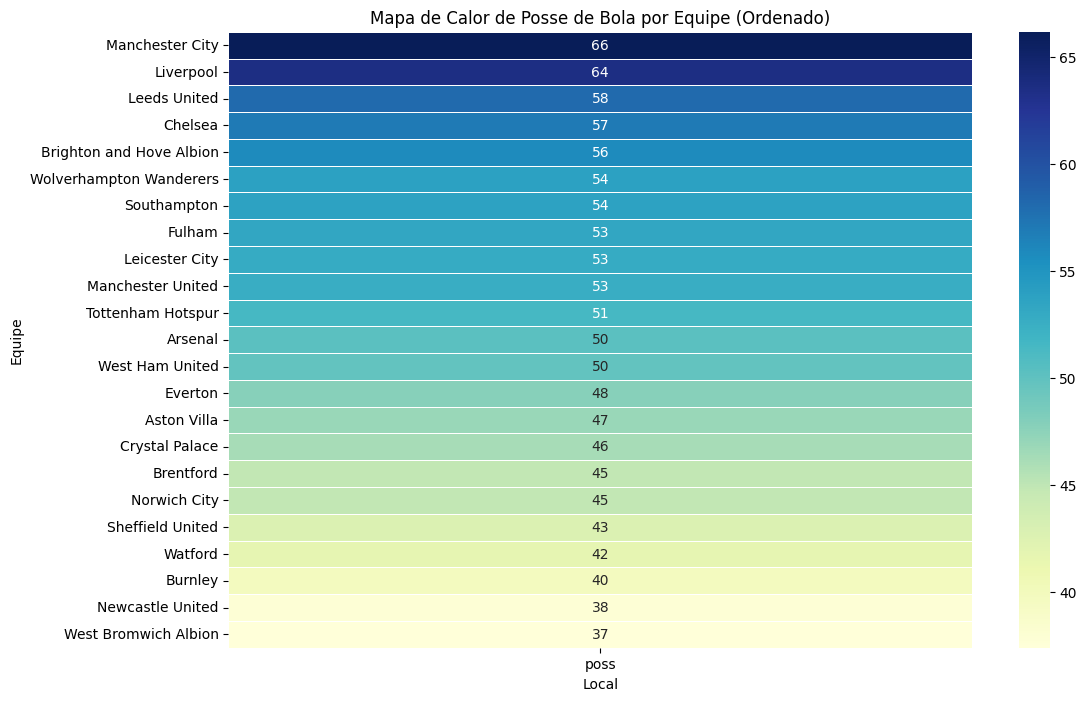

In [8]:
# Carregando o arquivo CSV
df = pd.read_csv('/content/matches.csv')

# Filtrar os jogos em que a equipe mandante perdeu (resultado 'L')
df_lost_games = df[(df['result'] == 'L') & (df['venue'] == 'Home')]

# Calcular a média de posse de bola ('poss') para cada equipe mandante
avg_possession_per_team = df_lost_games.groupby('team')['poss'].mean().reset_index()

# Ordenar os valores para facilitar a visualização no gráfico
avg_possession_per_team = avg_possession_per_team.sort_values(by='poss', ascending=False)

# Criar o gráfico de barras interativo usando Plotly
fig = go.Figure()

# Adicionando as barras
fig.add_trace(go.Bar(
    x=avg_possession_per_team['team'],
    y=avg_possession_per_team['poss'],
    marker_color='teal',
    hoverinfo='x+y',
    text=avg_possession_per_team['poss'],
    textposition='outside',
    name='Média de Posse'
))

# Título e rótulos dos eixos
fig.update_layout(
    title='Média de Posse de Bola da Equipe Mandante Quando Perdeu o Jogo',
    xaxis_title='Equipe',
    yaxis_title='Média de Posse de Bola (%)',
    xaxis_tickangle=-45,
    height=600,
    width=900,
    bargap=0.2
)

# Exibir o gráfico interativo
fig.show()

# Gerar o mapa de calor usando Matplotlib e Seaborn, ordenando as equipes pela média de posse
plt.figure(figsize=(12, 8))

# Ordenar as equipes de acordo com a mesma ordem do gráfico de barras
heatmap_data = df_lost_games.pivot_table(values='poss', index='team', aggfunc='mean')
heatmap_data = heatmap_data.loc[avg_possession_per_team['team']]

# Criar o mapa de calor
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5)

# Título e ajustes
plt.title("Mapa de Calor de Posse de Bola por Equipe (Ordenado)")
plt.xlabel('Local')
plt.ylabel('Equipe')
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [5]:
# Carregar o arquivo CSV
df = pd.read_csv('/content/matches.csv')

# Definir pontos: 3 para vitórias, 1 para empates, 0 para derrotas
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else (1 if x == 'D' else 0))

# Agrupar por equipe e somar os pontos
team_stats = df.groupby('team').agg({
    'points': 'sum',        # Total de pontos
    'result': lambda x: (x == 'W').sum(),  # Vitórias
    'gf': 'sum',            # Gols feitos (opcional)
    'ga': 'sum'             # Gols sofridos (opcional)
}).rename(columns={'result': 'wins', 'gf': 'goals_for', 'ga': 'goals_against'}).reset_index()

# Ordenar as equipes por pontos (decrescente)
team_stats = team_stats.sort_values(by='points', ascending=False).reset_index(drop=True)

# Adicionar a posição final
team_stats['position'] = team_stats.index + 1

# Configuração da API-Football
api_key = 'd6b9fd8cbc00a4867f105a06b6cc1f4bda6bcd14296825deb8d67fe4a8e96578'  # Substitua pela sua chave de API
api_url = 'https://apiv3.apifootball.com/?action=get_teams&league_id=152&APIkey=' + api_key

# Fazer a requisição para obter dados dos times
response = requests.get(api_url)
data = response.json()


# Criar um dicionário com URLs das logos
logos = {team['team_name']: team['team_badge'] for team in data}

# Verificar o conteúdo do dicionário de logos
print("Dicionário de logos:", logos)

# Adicionar URLs das logos ao DataFrame
team_stats['logo'] = team_stats['team'].map(logos)

# Verificar correspondência entre equipes e logos
for team in team_stats['team'].head():
    print(f"Team: {team}, Logo: {logos.get(team, 'Logo not found')}")

# Corrigir a coluna 'logo' no DataFrame original usando .loc
team_stats.loc[:, 'logo'] = team_stats['logo'].apply(lambda x: f'<img src="{x}" width="50" height="50">' if pd.notnull(x) else '')

# Verificar quantos times têm logos válidas
valid_logos = team_stats['logo'].notnull().sum()
print(f"Times com logo válida: {valid_logos} de {len(team_stats)}")

# Exibir uma amostra da tabela com URLs das logos
def render_images(df):
    return df.to_html(escape=False)

# Mostrar a tabela com logos
HTML(render_images(team_stats[['position', 'team', 'points', 'wins', 'logo']]))


Dicionário de logos: {'Manchester City': 'https://apiv3.apifootball.com/badges/80_manchester-city.jpg', 'Liverpool': 'https://apiv3.apifootball.com/badges/84_liverpool.jpg', 'Chelsea': 'https://apiv3.apifootball.com/badges/88_chelsea.jpg', 'Manchester United': 'https://apiv3.apifootball.com/badges/102_manchester-united.jpg', 'Arsenal': 'https://apiv3.apifootball.com/badges/141_arsenal.jpg', 'Leicester City': 'https://apiv3.apifootball.com/badges/155_leicester-city.jpg', 'Tottenham Hotspur': 'https://apiv3.apifootball.com/badges/164_tottenham-hotspur.jpg', 'AFC Bournemouth': 'https://apiv3.apifootball.com/badges/3071_afc-bournemouth.jpg', 'Southampton': 'https://apiv3.apifootball.com/badges/3072_southampton.jpg', 'Everton': 'https://apiv3.apifootball.com/badges/3073_everton.jpg', 'Wolverhampton Wanderers': 'https://apiv3.apifootball.com/badges/3077_wolverhampton-wanderers.jpg', 'Brighton & Hove Albion': 'https://apiv3.apifootball.com/badges/3079_brighton--hove-albion.jpg', 'West Ham Uni

,position,team,points,wins,logo
0,1,Manchester City,166,52,
1,2,Chelsea,132,38,
2,3,Manchester United,128,36,
3,4,Arsenal,121,37,
4,5,Tottenham Hotspur,120,36,
5,6,West Ham United,117,34,
6,7,Leicester City,108,31,
7,8,Wolverhampton Wanderers,94,27,
8,9,Leeds United,93,26,
9,10,Aston Villa,92,27,


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)